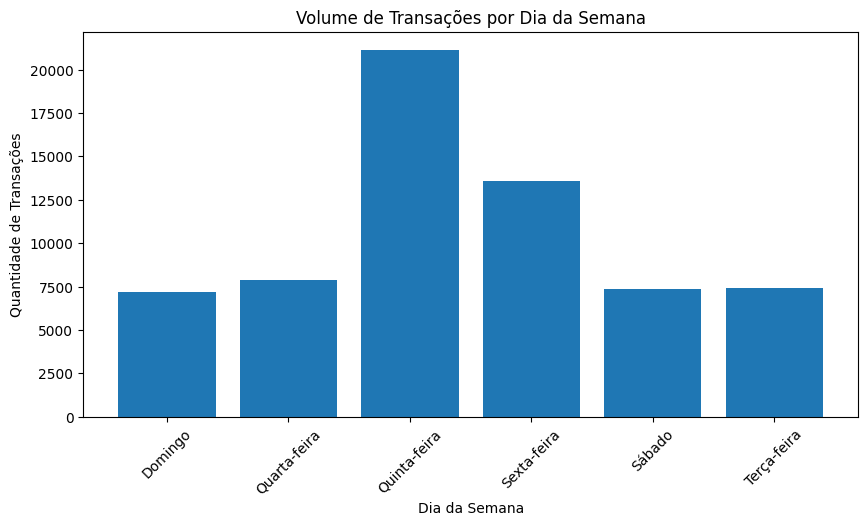

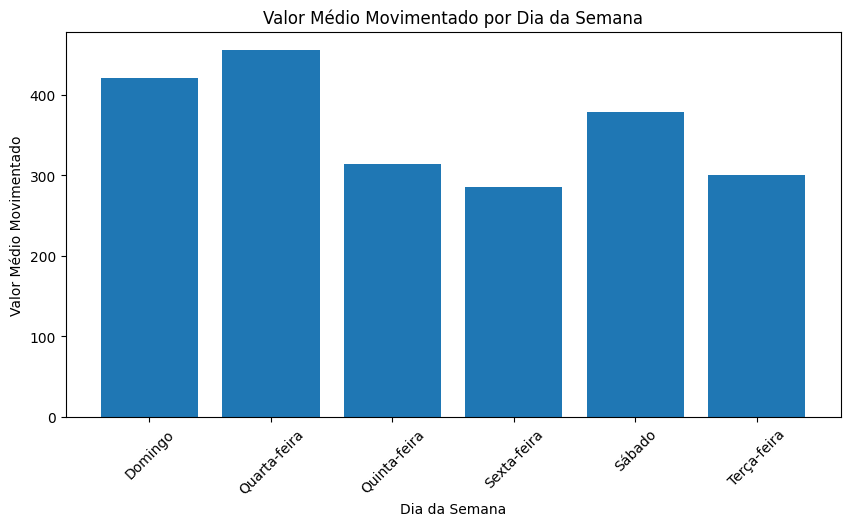

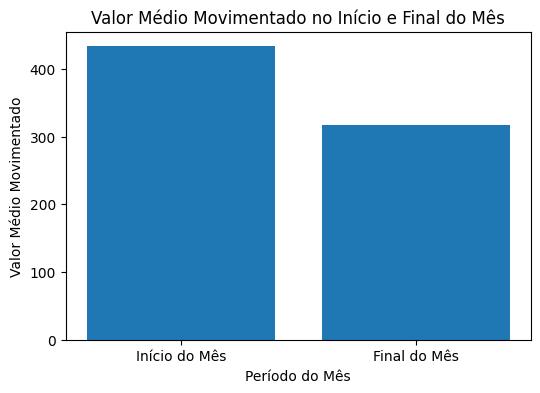

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo transacoes.csv
transacoes = pd.read_csv('transacoes.csv')

# Convertendo o campo 'data_transacao' para datetime, considerando apenas data (dia, mês, ano)
transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'].str.split(' ').str[0], format='%Y-%m-%d')

# Convertendo o campo 'valor_transacao' para float
transacoes['valor_transacao'] = transacoes['valor_transacao'].astype(float)

# Analisando o volume de transações por dia da semana
transacoes['dia_semana'] = transacoes['data_transacao'].dt.dayofweek
dias_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    0: 'Domingo'
}
transacoes['dia_semana_nome'] = transacoes['dia_semana'].map(dias_semana)
volume_por_dia = transacoes.groupby('dia_semana_nome').size()

# Criando o gráfico de barras para o volume de transações
plt.figure(figsize=(10, 5))
plt.bar(volume_por_dia.index, volume_por_dia.values)
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Transações')
plt.title('Volume de Transações por Dia da Semana')
plt.xticks(rotation=45)
plt.show()

# Analisando o valor movimentado por dia da semana
valor_por_dia = transacoes.groupby('dia_semana_nome')['valor_transacao'].mean()

# Criando o gráfico de barras para o valor movimentado
plt.figure(figsize=(10, 5))
plt.bar(valor_por_dia.index, valor_por_dia.values)
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Médio Movimentado')
plt.title('Valor Médio Movimentado por Dia da Semana')
plt.xticks(rotation=45)
plt.show()

# Analisando o valor movimentado no início e final do mês
transacoes['inicio_mes'] = (transacoes['data_transacao'].dt.day <= 15).astype(int)
transacoes['final_mes'] = (transacoes['data_transacao'].dt.day > 15).astype(int)

valor_inicio_mes = transacoes[transacoes['inicio_mes'] == 1]['valor_transacao'].mean()
valor_final_mes = transacoes[transacoes['final_mes'] == 1]['valor_transacao'].mean()

# Criando o gráfico de barras para o valor movimentado no início e final do mês
plt.figure(figsize=(6, 4))
plt.bar(['Início do Mês', 'Final do Mês'], [valor_inicio_mes, valor_final_mes])
plt.xlabel('Período do Mês')
plt.ylabel('Valor Médio Movimentado')
plt.title('Valor Médio Movimentado no Início e Final do Mês')
plt.show()

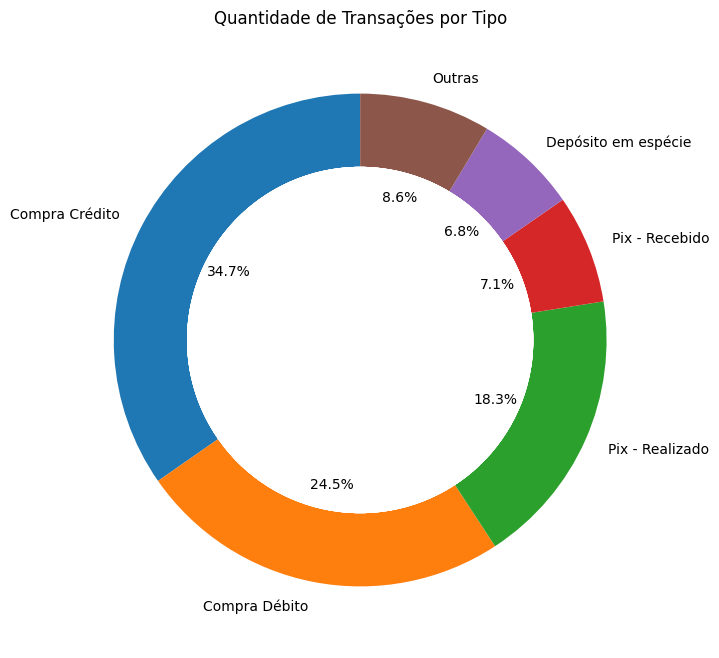

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando o arquivo transacoes.csv
transacoes = pd.read_csv('transacoes.csv')

# Convertendo o campo 'data_transacao' para datetime, considerando apenas data (dia, mês, ano)
transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'].str.split(' ').str[0], format='%Y-%m-%d')

# Convertendo o campo 'valor_transacao' para float
transacoes['valor_transacao'] = transacoes['valor_transacao'].astype(float)

# Analisando a quantidade de transações por tipo de transação
transacoes_por_tipo = transacoes['nome_transacao'].value_counts()

# Obtendo os 5 tipos de transação mais frequentes
top_5_transacoes = transacoes_por_tipo.nlargest(5)

# Agrupando as demais transações como 'Outras'
transacoes_por_tipo_restantes = transacoes_por_tipo[~transacoes_por_tipo.index.isin(top_5_transacoes.index)]
outras_transacoes = transacoes_por_tipo_restantes.sum()

# Criando o gráfico de pizza para a quantidade de transações por tipo
plt.figure(figsize=(8, 8))
labels = list(top_5_transacoes.index) + ['Outras']
sizes = list(top_5_transacoes.values) + [outras_transacoes]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Adicionando a quantidade de clientes em cada fatia
for i, v in enumerate(sizes):
    ang = (360 * v / sum(sizes))
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    plt.gcf().gca().add_artist(my_circle)
    #plt.text(0.2 * np.cos(ang * np.pi / 180), 0.2 * np.sin(ang * np.pi / 180), f'{v} ({(v / sum(sizes) * 100):.1f}%)',
             #ha='center', va='bottom')

plt.title('Quantidade de Transações por Tipo')
plt.show()